In [199]:
import math
import time
import copy
import numpy as np
import seaborn as sns
import sklearn.datasets
import matplotlib.colors
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.datasets import make_blobs, load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from sklearn.preprocessing import OneHotEncoder

sns.set()

#FEED FORWARD NEURAL NETWORKS

In [152]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

In [153]:
data_orig, labels_orig = make_blobs(n_samples=1000,n_features=2,random_state=0,centers=4)
#print(data.dtype,labels.shape)

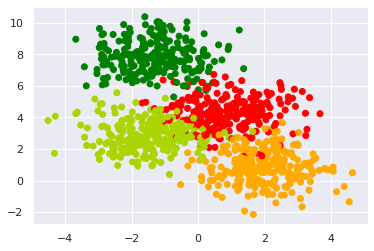

In [154]:
plt.scatter(data_orig[:,0],data_orig[:,1],cmap=my_cmap,c=labels_orig)
plt.show()

In [155]:
data = data_orig
labels_temp = labels_orig
labels = np.mod(labels_temp,2)

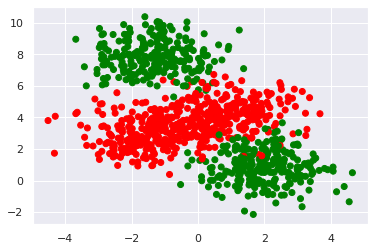

In [156]:
plt.scatter(data[:,0],data[:,1],c= labels,cmap=my_cmap)

In [157]:
def make_meshgrid(x,y,h=0.2):
    xmin,xmax = x.min()-0.5 , x.max()+0.5
    ymin,ymax = y.min()-0.5 , y.max()+0.5
    xx,yy = np.meshgrid(np.arange(xmin,xmax),np.arange(ymin,ymax))
    return xx,yy
def plot_contour(ax,predict,xx,yy, **params):
    Z = predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx,yy,Z,**params)
    return out
def plot_boundary(ffnnw1):
    xx, yy = make_meshgrid(X_train[:,0],X_train[:,1])
    predict_functions = [ffnnw1.predict_h1,ffnnw1.predict_h2,ffnnw1.predict_h3]

    for i in range(3):
        fig, ax = plt.subplots(figsize=(10,5))

        plot_contour(ax,predict_functions[i],xx,yy,cmap = my_cmap, alpha=0.2)
        ax.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=my_cmap,alpha=0.2)
        ax.set_xlim(xx.min(),xx.max())
        ax.set_ylim(yy.min(),yy.max())
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_title("h"+str(i+1))
    return True

#FeedForward Neural network without vectorisation (update each weight separately)




In [158]:
X_train ,X_val,Y_train,Y_val = train_test_split(data,labels,stratify=labels,random_state=0)

In [159]:
class FFNN:
    def __init__(self):
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0
    def sigmoid(self,x):
        return 1.0/(1.0 + np.exp(-x))
    def forward_pass(self,X):
        self.x1,self.x2 =  X
        self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
        self.h1 = self.sigmoid(self.a1)
        self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
        self.h2 = self.sigmoid(self.a2)
        self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
        self.h3 = self.sigmoid(self.a3)
        return self.h3

    def grad(self,x,y):
        self.forward_pass(x)
        
        self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
        self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
        self.db3 = (self.h3-y) * self.h3*(1-self.h3) 

        self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
        self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
        self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) 

        self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
        self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
        self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) 

    def fit(self,X,Y,epochs=1,lr=1,initialise=True,display_loss=False):
        if initialise:
            self.w1 = np.random.randn()
            self.w2 = np.random.randn()
            self.w3 = np.random.randn()
            self.w4 = np.random.randn()
            self.w5 = np.random.randn()
            self.w6 = np.random.randn()
            self.b1 = 0
            self.b2 = 0
            self.b3 = 0
        if display_loss:
            loss = {}        
        for i in tqdm(range(epochs),total=epochs, unit='epochs'):
            dw1,dw2,dw3,dw4,dw5,dw6,db1,db2,db3 = [0]*9
            for x,y in zip(X,Y):
                self.grad(x,y)
                dw1 += self.dw1 
                dw2 += self.dw2 
                dw3 += self.dw3 
                dw4 += self.dw4 
                dw5 += self.dw5 
                dw6 += self.dw6 
                db1 += self.db1 
                db2 += self.db2 
                db3 += self.db3 
            m = X.shape[1]
            self.w1 -= lr * dw1/m
            self.w2 -= lr * dw2/m
            self.w3 -= lr * dw3/m
            self.w4 -= lr * dw4/m
            self.w5 -= lr * dw5/m
            self.w6 -= lr * dw6/m
            self.b1 -= lr * db1/m
            self.b2 -= lr * db2/m
            self.b3 -= lr * db3/m
            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = mean_squared_error(Y_pred,Y)
        if display_loss:
            plt.plot(list(loss.values()))
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()

    def predict(self,X):
        Y_pred = []
        for x in X:
            Y_pred.append(self.forward_pass(x))
        return np.array(Y_pred)

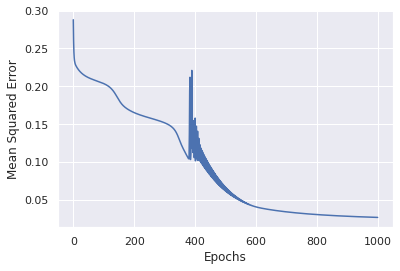

In [163]:
fnn = FFNN()
fnn.fit(X_train,Y_train,epochs=1000,lr=0.01,display_loss=True)

In [164]:
Y_pred_train = fnn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train>=0.5).astype('int').ravel()
Y_pred_val = fnn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val>=0.5).astype('int').ravel()

In [165]:
accuracy_train = accuracy_score(Y_pred_binarised_train,Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val,Y_val)
print("The training accuracy is",accuracy_train)
print("The validation accuracy is",accuracy_val)

The training accuracy is 0.976
The validation accuracy is 0.94


#Single weight update feed-forward NN


In [166]:
np.random.seed(0)
W1 = np.random.randn(2,2)
W2 = np.random.randn(2,4)

In [167]:
X_train ,X_val,Y_train,Y_val = train_test_split(data_orig,labels_orig,stratify=labels_orig,random_state=0)

In [179]:
class FFNN:
    def __init__(self,W1,W2):
        self.w1 = W1[0][0].copy()
        self.w2 = W1[1][0].copy()
        self.w3 = W1[0][1].copy()
        self.w4 = W1[1][1].copy()
        self.w5 = W2[0][0].copy()
        self.w6 = W2[1][0].copy()
        self.w7 = W2[0][1].copy()
        self.w8 = W2[1][1].copy()
        self.w9 = W2[0][2].copy()
        self.w10 = W2[1][2].copy()
        self.w11 = W2[0][3].copy()
        self.w12 = W2[1][3].copy()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0
        self.b4 = 0
        self.b5 = 0
        self.b6 = 0

    def sigmoid(self,x):
        return 1.0/(1.0 + np.exp(-x))
    def forward_pass(self,X):
        #input layer
        self.x1,self.x2 = X
        
        #hidden layers
        self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
        self.h1 = self.sigmoid(self.a1)
        self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
        self.h2 = self.sigmoid(self.a2)

        #output layer
        self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
        self.a4 = self.w7*self.h1 + self.w8*self.h2 + self.b4
        self.a5 = self.w9*self.h1 + self.w10*self.h2 + self.b5
        self.a6 = self.w11*self.h1 + self.w12*self.h2 + self.b6
        sum_exps = np.sum([np.exp(self.a3),np.exp(self.a4),np.exp(self.a5),np.exp(self.a6)])
        self.h3 = np.exp(self.a3)/sum_exps
        self.h4 = np.exp(self.a4)/sum_exps
        self.h5 = np.exp(self.a5)/sum_exps
        self.h6 = np.exp(self.a6)/sum_exps
        return np.array([self.h3,self.h4,self.h5,self.h6])

    def grad(self,x,y):
        self.forward_pass(x)
        self.y1,self.y2,self.y3,self.y4 = y
               
        self.da3 = (self.h3-self.y1)
        self.da4 = (self.h4-self.y2)
        self.da5 = (self.h5-self.y3)
        self.da6 = (self.h6-self.y4)

        self.dw5 = self.da3 * self.h1
        self.dw6 = self.da3 * self.h2 
        self.db3 = self.da3
        
        self.dw7 = self.da4 * self.h1
        self.dw8 = self.da4 * self.h2 
        self.db4 = self.da4
        
        self.dw9 = self.da5 * self.h1
        self.dw10 = self.da5 * self.h2 
        self.db5 = self.da5
        
        self.dw11 = self.da6 * self.h1
        self.dw12 = self.da6 * self.h2 
        self.db6 = self.da6
        
        self.dh1 = self.da3*self.w5 + self.da4*self.w7 + self.da5*self.w9 + self.da6*self.w11
        self.dh2 = self.da3*self.w6 + self.da4*self.w8 + self.da5*self.w10 + self.da6*self.w12

        self.da1 = self.dh1 * self.h1*(1-self.h1)
        self.da2 = self.dh2 * self.h2*(1-self.h2)

        self.dw1 = self.da1*self.x1
        self.dw2 = self.da1*self.x2
        self.db1 = self.da1

        self.dw3 = self.da2*self.x1
        self.dw4 = self.da2*self.x2
        self.db2 = self.da2

    def fit(self,X,Y,epochs=1,lr=1,display_loss=False):        
        if display_loss:
            loss = {}
            """W1 = {}
            W2 = {}
            W3 = {}
            W4 = {}
            W5 = {}
            W6 = {}
            B1 = {}
            B2 = {}
            B3 = {}"""
        
        for e in tqdm(range(epochs), total=epochs, unit="epoch"):
            dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9,dw10,dw11,dw12,db1,db2,db3,db4,db5,db6 = [0]*18
            for x, y in zip(X, Y):
                self.grad(x, y)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                dw7 += self.dw7
                dw8 += self.dw8
                dw9 += self.dw9
                dw10 += self.dw10
                dw11 += self.dw11
                dw12 += self.dw12
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3
                db4 += self.db4
                db5 += self.db5
                db6 += self.db6

            self.w1 -= lr * (dw1/X.shape[0])
            self.w2 -= lr * (dw2/X.shape[0])
            self.w3 -= lr * (dw3/X.shape[0])
            self.w4 -= lr * (dw4/X.shape[0])
            self.w5 -= lr * (dw5/X.shape[0])
            self.w6 -= lr * (dw6/X.shape[0])
            self.w7 -= lr * (dw7/X.shape[0])
            self.w8 -= lr * (dw8/X.shape[0])
            self.w9 -= lr * (dw9/X.shape[0])
            self.w10 -= lr * (dw10/X.shape[0])
            self.w11 -= lr * (dw11/X.shape[0])
            self.w12 -= lr * (dw12/X.shape[0])
            self.b1 -= lr * (db1/X.shape[0])
            self.b2 -= lr * (db2/X.shape[0])
            self.b3 -= lr * (db3/X.shape[0])
            self.b4 -= lr * (db4/X.shape[0])
            self.b5 -= lr * (db5/X.shape[0])
            self.b6 -= lr * (db6/X.shape[0])
        
            if display_loss:
                Y_pred = self.predict(X)
                loss[e] = mean_squared_error(Y_pred, Y)
                """W1[e] = self.w1
                W2[e] = self.w2
                W3[e] = self.w3
                W4[e] = self.w4
                W5[e] = self.w5
                W6[e] = self.w6
                B2[e] = self.b1
                B2[e] = self.b2
                B3[e] = self.b3"""
        
        if display_loss:

            """plt.subplot(10,1,1)
            plt.plot(list(W1.values()))
            plt.xlabel('Epochs')
            plt.ylabel('W1')

            plt.subplot(10,1,2)
            plt.plot(list(W2.values()))
            plt.xlabel('Epochs')
            plt.ylabel('W2')

            plt.subplot(10,1,3)
            plt.plot(list(W3.values()))
            plt.xlabel('Epochs')
            plt.ylabel('W3')

            plt.subplot(10,1,4)
            plt.plot(list(W4.values()))
            plt.xlabel('Epochs')
            plt.ylabel('W4')

            plt.subplot(10,1,5)
            plt.plot(list(W5.values()))
            plt.xlabel('Epochs')
            plt.ylabel('W5')

            plt.subplot(10,1,6)
            plt.plot(list(W6.values()))
            plt.xlabel('Epochs')
            plt.ylabel('W6')

            plt.subplot(10,1,7)
            plt.plot(list(B1.values()))
            plt.xlabel('Epochs')
            plt.ylabel('B1')

            plt.subplot(10,1,8)
            plt.plot(list(B2.values()))
            plt.xlabel('Epochs')
            plt.ylabel('B2')

            plt.subplot(10,1,9)
            plt.plot(list(B3.values()))
            plt.xlabel('Epochs')
            plt.ylabel('B3')

            plt.subplot(10,1,10)"""
            plt.plot(list(loss.values()))
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()

    def predict(self,X):
        Y_pred = []
        for x in X:
            Y_pred.append(self.forward_pass(x))
        return np.array(Y_pred)
    def predict_h1(self,X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(self.h1)
        return np.array(Y_pred)
    def predict_h2(self,X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(self.h2)
        return np.array(Y_pred)
    def predict_h3(self,X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(self.h3)
        return np.array(Y_pred)

In [180]:
enc = OneHotEncoder()
Y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
Y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(Y_OH_train.shape,Y_OH_val.shape)

(750, 4) (250, 4)


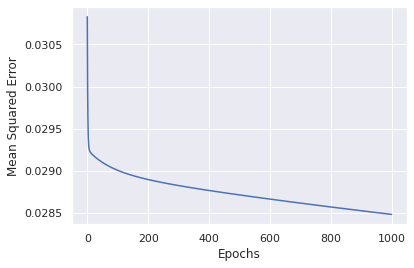

In [227]:
ffnn = FFNN(W1,W2)
ffnn.fit(X_train,Y_OH_train,epochs=3000,lr=0.1,display_loss=True) 

True

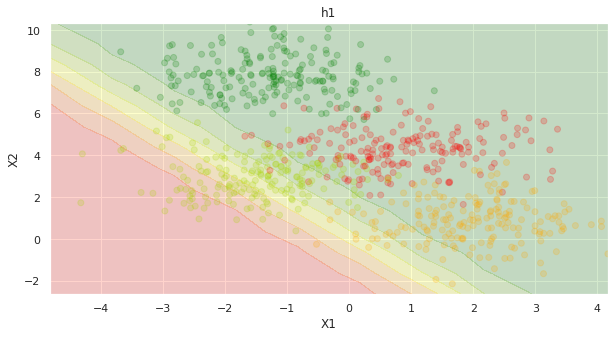

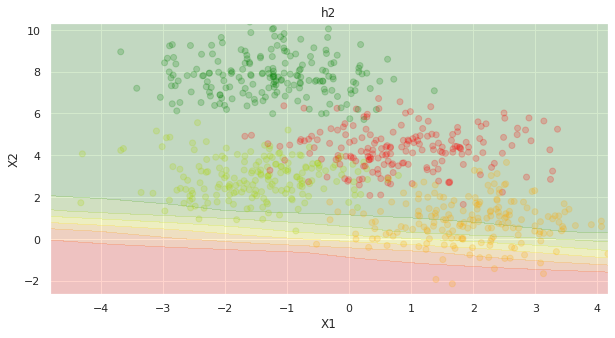

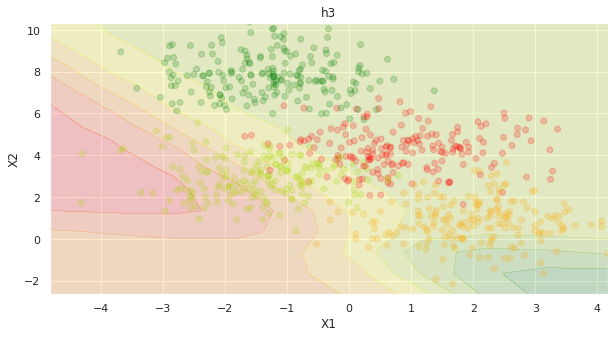

In [182]:
plot_boundary(ffnn)

In [228]:
Y_pred_train = np.argmax(ffnn.predict(X_train),1)
#Y_pred_binarised_train = (Y_pred_train>=0.5).astype('int').ravel()
Y_pred_val = np.argmax(ffnn.predict(X_val),1)
#Y_pred_binarised_val = (Y_pred_val>=0.5).astype('int').ravel()

In [229]:
accuracy_train = accuracy_score(Y_pred_train,Y_train)
accuracy_val = accuracy_score(Y_pred_val,Y_val)
print("The training accuracy is",accuracy_train)
print("The validation accuracy is",accuracy_val)

The training accuracy is 0.9213333333333333
The validation accuracy is 0.948


#FeedForward neural network with vectorisation and 1 output class

In [130]:
class genFFNN:
  
    def __init__(self, n_inputs, hidden_sizes=[2]):
        self.nx = n_inputs
        self.ny = 1
        self.nh = len(hidden_sizes)
        self.sizes = [self.nx] + hidden_sizes + [self.ny]
        
        self.W = {}
        self.B = {}
        for i in range(self.nh+1):
            self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
            self.B[i+1] = np.zeros((1, self.sizes[i+1]))
    
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def forward_pass(self, x):
        self.A = {}
        self.H = {}
        self.H[0] = x.reshape(1, -1)
        for i in range(self.nh+1):
            self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
            self.H[i+1] = self.sigmoid(self.A[i+1])
        return self.H[self.nh+1]
    
    def grad_sigmoid(self, x):
        return x*(1-x) 
        
    def grad(self, x, y):
        self.forward_pass(x)
        self.dW = {}
        self.dB = {}
        self.dH = {}
        self.dA = {}
        L = self.nh + 1
        self.dA[L] = (self.H[L] - y)
        for k in range(L, 0, -1):
            self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
            self.dB[k] = self.dA[k]
            self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
            self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
        
    def fit(self, X, Y, epochs=1, lr=1, initialise=True, display_loss=False):
        
        # initialise w, b
        if initialise:
            for i in range(self.nh+1):
                self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
                self.B[i+1] = np.zeros((1, self.sizes[i+1]))
        
        if display_loss:
            loss = {}
        
        for e in tqdm(range(epochs), total=epochs, unit="epoch"):
            dW = {}
            dB = {}
            for i in range(self.nh+1):
                dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
                dB[i+1] = np.zeros((1, self.sizes[i+1]))
            for x, y in zip(X, Y):
                self.grad(x, y)
                for i in range(self.nh+1):
                    dW[i+1] += self.dW[i+1]
                    dB[i+1] += self.dB[i+1]
            
            m = X.shape[1]
            for i in range(self.nh+1):
                self.W[i+1] -= lr * dW[i+1] / m
                self.B[i+1] -= lr * dB[i+1] / m
        
            if display_loss:
                Y_pred = self.predict(X)
                loss[e] = mean_squared_error(Y_pred, Y)
        
        if display_loss:
            plt.plot(list(loss.values()))
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
        
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred).squeeze()

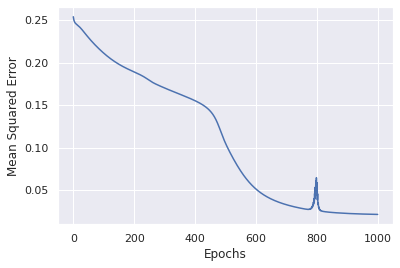

In [131]:
ffsn = genFFNN(2,[2,3])
ffsn.fit(X_train,Y_train,epochs=1000,lr=0.001,display_loss=True)

In [132]:
Y_pred_train = ffsn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train>=0.5).astype('int').ravel()
Y_pred_val = ffsn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val>=0.5).astype('int').ravel()

accuracy_train = accuracy_score(Y_pred_binarised_train,Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val,Y_val)
print(accuracy_train,accuracy_val)

0.976 0.94


#FeedForward neural network with vectorisation and multiple output classes

In [ ]:
X_train ,X_val,Y_train,Y_val = train_test_split(data_orig,labels_orig,stratify=labels_orig,random_state=0)

In [138]:
enc = OneHotEncoder()
Y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
Y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(Y_OH_train.shape,Y_OH_val.shape)

(750, 4) (250, 4)


In [139]:
np.random.seed(0)
W1 = np.random.randn(2,2)
W2 = np.random.randn(2,4)

In [140]:
class FF_Multiclass_Vectorised:
    def __init__(self,W1,W2):
        self.W1 = W1.copy()
        self.W2 = W2.copy()
        self.B1 = np.zeros((1,2))
        self.B2 = np.zeros((1,4))
    def sigmoid(self,x):
        return 1.0/(1.0 + np.exp(-x))
    def softmax(self,x):
        exps = np.exp(x)
        return exps/np.sum(exps)
    def forward_pass(self,X):
        X = X.reshape(1,-1)
        self.A1 = np.matmul(X,self.W1) + self.B1  #(1,2)
        self.H1 = self.sigmoid(self.A1)             #(1,2)
        self.A2 = np.matmul(self.H1,self.W2)        #(1,4)
        self.H2 = self.sigmoid(self.A2)             #(1,4)
        return self.H2
    def grad_sigmoid(self,x):
        return x*(1-x)
    def grad(self,X,Y):
        self.forward_pass(X)
        X = X.reshape(1,-1)
        Y = Y.reshape(1,-1)
        
        self.dA2 = self.H2 - Y                      #(1,4)

        self.dW2 = np.matmul(self.H1.T,self.dA2)    #(2,4)
        self.dB2 = self.dA2                         #(1,4)
        self.dH1 = np.matmul(self.dA2,self.W2.T)      #(1,2)
        self.dA1 = np.multiply(self.dH1,self.grad_sigmoid(self.H1))

        self.dW1 = np.matmul(X.T,self.dA1)
        self.dB1 = self.dA1
    def fit(self,X,Y,epochs=1,lr=1,display_loss=False):
        m = X.shape[0]
        if display_loss:
            loss = {}
        for i in tqdm(range(epochs), total=epochs, unit="epochs"):
            dW1 = np.zeros((2,2))
            dB1 = np.zeros((1,2))
            dW2 = np.zeros((2,4))
            dB2 = np.zeros((1,4))
            for x,y in zip(X,Y):
                self.grad(x,y)
                dW1 += self.dW1
                dW2 += self.dW2
                dB1 += self.dB1
                dB2 += self.dB2
            self.W1 -= lr * (dW1/m)
            self.W2 -= lr * (dW2/m)
            self.B1 -= lr * (dB1/m)
            self.B2 -= lr * (dB2/m)
            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = log_loss(Y,Y_pred)
        if display_loss:
            plt.plot(list(loss.values()))
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.show()

    def predict(self,X):
        Y_pred = []
        for x in X:
            temp = self.forward_pass(x)
            Y_pred.append(temp)
        return np.array(Y_pred).squeeze()

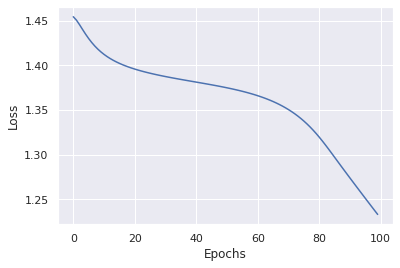

In [141]:
ffnn_mv = FF_Multiclass_Vectorised(W1,W2)
ffnn_mv.fit(X_train,Y_OH_train,epochs=100,lr=0.4,display_loss=True)

In [142]:
class FF_Multiclass_VectorisedInputs:
    def __init__(self,W1,W2):
        self.W1 = W1.copy()
        self.W2 = W2.copy()
        self.B1 = np.zeros((1,2))
        self.B2 = np.zeros((1,4))
    def sigmoid(self,X):
        return 1.0/(1.0 + np.exp(-X))
    def softmax(self,X):
        exps = np.exp(X)
        return exps/np.sum(exps,axis=1).reshape(1,-1)
    def forward_pass(self,X):
        #X = X.reshape(1,-1)
        self.A1 = np.matmul(X,self.W1) + self.B1                        #(N,2) * (2,2) ->  (N,2)
        self.H1 = self.sigmoid(self.A1)                                 #(N,2)
        self.A2 = np.matmul(self.H1,self.W2) + self.B2                  #(N,2) * (2,4) -> (N,4)
        self.H2 = self.sigmoid(self.A2)                                 #(N,4)
        return self.H2
    def grad_sigmoid(self,X):
        return X*(1-X)
    def grad(self,X,Y):
        self.forward_pass(X)
        #X = X.reshape(1,-1)
        #Y = Y.reshape(1,-1)
        
        self.dA2 = self.H2 - Y                                          #(N,4) - (N,4) -> (N,4)

        self.dW2 = np.matmul(self.H1.T,self.dA2)                        #(2,N) * (N,4) -> (2,4)
        self.dB2 = np.sum(self.dA2,axis=0).reshape(1,-1)                #(N,4) 
        self.dH1 = np.matmul(self.dA2,self.W2.T)                        #(N,4) * (4,2) -> (N,2)
        self.dA1 = np.multiply(self.dH1,self.grad_sigmoid(self.H1))     #(N,2) 

        self.dW1 = np.matmul(X.T,self.dA1)                              #(2,N) * (N,2) -> (2,2)
        self.dB1 = np.sum(self.dA1,axis=0).reshape(1,-1)                #(1,2)
    def fit(self,X,Y,epochs=1,lr=1,display_loss=False):         
        m = X.shape[0]
        if display_loss:
            loss = {}

        for i in tqdm(range(epochs), total=epochs, unit="epochs"):
            self.grad(X,Y)
            
            self.W1 -= lr * (self.dW1/m)
            self.W2 -= lr * (self.dW2/m)
            self.B1 -= lr * (self.dB1/m)
            self.B2 -= lr * (self.dB2/m)
            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = log_loss(Y,Y_pred)
        if display_loss:
            plt.plot(list(loss.values()))
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.show()

    def predict(self,X):

        Y_pred=self.forward_pass(X)
        return np.array(Y_pred).squeeze()

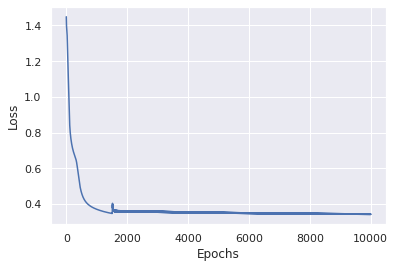

In [143]:
f = FF_Multiclass_VectorisedInputs(W1,W2)
f.fit(X_train,Y_OH_train,epochs=10000,lr=0.7,display_loss=True)

#Comparaision Between Models

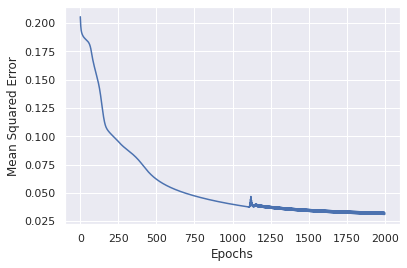

Time taken by model 1 : 121.18122029304504


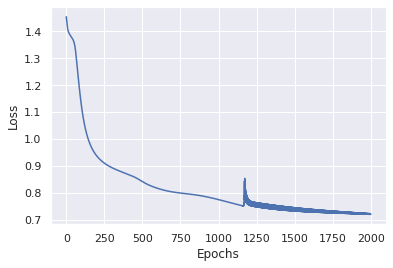

Time taken by model 2 : 65.9004807472229


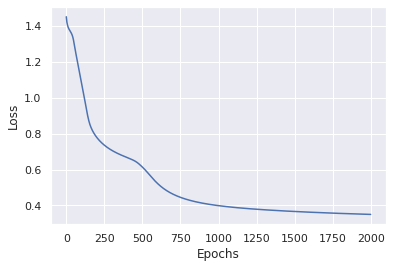

Time taken by model 3 : 4.072863578796387


In [230]:
models_init = [FFNN(W1,W2),FF_Multiclass_Vectorised(W1,W2),FF_Multiclass_VectorisedInputs(W1,W2)]
models = []

for idx,model in enumerate(models_init,start=1):
    tic = time.time()
    ffsn_m = model
    ffsn_m.fit(X_train,Y_OH_train,epochs=2000,lr=0.5,display_loss=True)
    models.append(ffsn_m)
    toc = time.time()
    print("Time taken by model {} : {}".format(idx,toc-tic))
